In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('Toyota_Data.csv')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
# 1. Basic Dataset Overview
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nMissing Values:")
print(df.isna().sum())
print("\nDescriptive Statistics:")
print(df.describe())

=== Dataset Overview ===
Shape: (11291, 6)

First few rows:
            Adj Close     Close      High       Low      Open  Volume
Date                                                                 
1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000   41109
1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000    9343
1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606       0
1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000   10277
1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000    8409

Missing Values:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Descriptive Statistics:
          Adj Close         Close          High           Low          Open  \
count  11291.000000  11291.000000  11291.000000  11291.000000  11291.000000   
mean      63.586275     72.057776     72.478879     71.646418     67.955424   
std       52.272225     51.295776     51.552662     50.976716     55

In [5]:
import os
import matplotlib.pyplot as plt

# Ensure the 'output/' directory exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.title('Toyota Motors Closing Price (1980-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Save the plot to 'output/close_price_trend.png'
plt.savefig(os.path.join(output_dir, 'close_price_trend.png'))
plt.close()


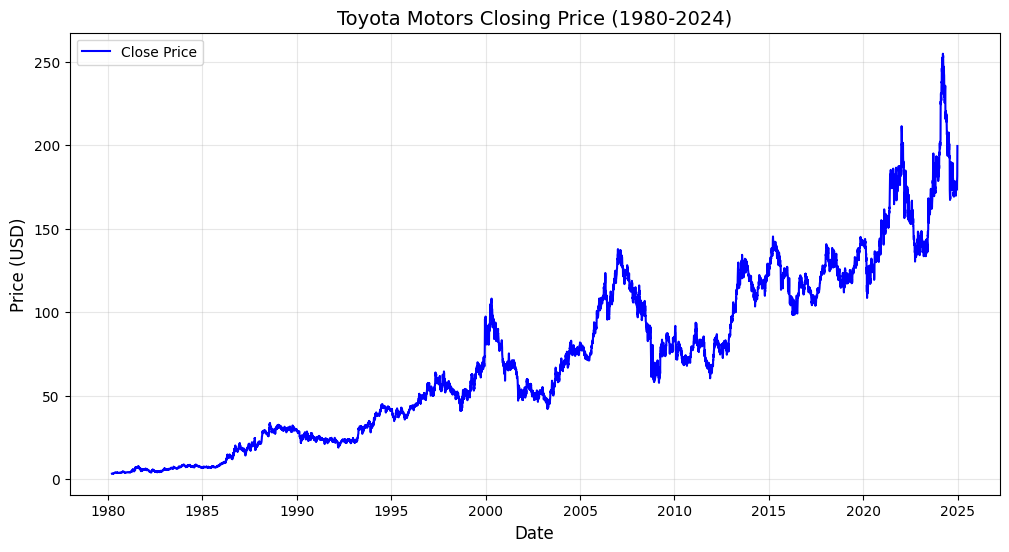

In [6]:
# Plot Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.title('Toyota Motors Closing Price (1980-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

In [9]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'output/' directory exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Stock Features', fontsize=14)

# Save the heatmap to 'output/correlation_heatmap.png'
plt.savefig(os.path.join(output_dir, 'correlation_heatmap.png'))
plt.close()


Text(0.5, 1.0, 'Correlation Matrix of Stock Features')

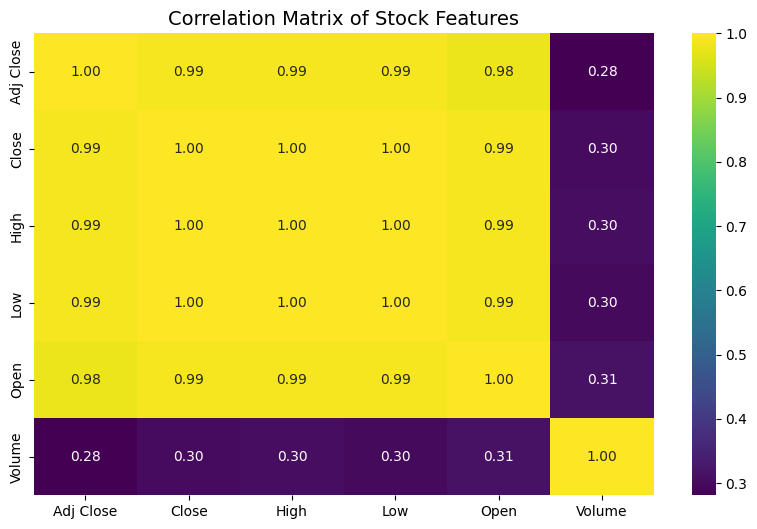

In [10]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Stock Features', fontsize=14)


In [12]:
# Import required modules
from statsmodels.tsa.stattools import adfuller

# Function to test stationarity
def test_stationarity(timeseries, title):
    result = adfuller(timeseries.dropna())  # Perform ADF test on the timeseries
    print(f'\n=== Stationarity Test (ADF) for {title} ===')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    return result[1] < 0.05  # Return True if p-value < 0.05 (indicating stationarity)

# Example: Call the function with your timeseries data
stationary = test_stationarity(df['Close'], 'Toyota Motors Closing Prices')

# Print result of stationarity test
if stationary:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")



=== Stationarity Test (ADF) for Toyota Motors Closing Prices ===
ADF Statistic: -0.4464
p-value: 0.9021
Critical Values:
	1%: -3.4309
	5%: -2.8618
	10%: -2.5669
The time series is not stationary.


In [14]:
# Focus on 'Close' price
series = df['Close']

In [15]:
# Test stationarity
is_stationary = test_stationarity(series, 'Close')
if not is_stationary:
    diff_series = series.diff().dropna()
    test_stationarity(diff_series, 'Close Differenced')
else:
    diff_series = series


=== Stationarity Test (ADF) for Close ===
ADF Statistic: -0.4464
p-value: 0.9021
Critical Values:
	1%: -3.4309
	5%: -2.8618
	10%: -2.5669

=== Stationarity Test (ADF) for Close Differenced ===
ADF Statistic: -21.9681
p-value: 0.0000
Critical Values:
	1%: -3.4309
	5%: -2.8618
	10%: -2.5669


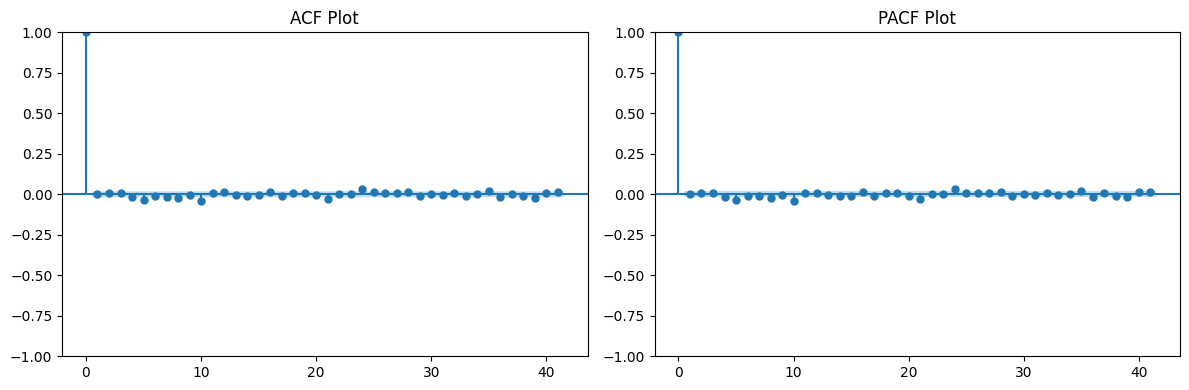

In [17]:
# Import required modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

# Ensure the diff_series is well-defined. For example:
diff_series = df['Close'].diff().dropna()

# Check if output directory exists, create if not
if not os.path.exists('output'):
    os.makedirs('output')

# Plot ACF and PACF
plt.figure(figsize=(12, 4))

# ACF Plot
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca())  # Autocorrelation plot
plt.title('ACF Plot')

# PACF Plot
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca())  # Partial autocorrelation plot
plt.title('PACF Plot')

# Adjust layout and save figure
plt.tight_layout()

# Save the plot as a file
plt.savefig('output/acf_pacf_plot.png')

# Show the plots (optional, for debugging purposes)
plt.show()

# Close the figure
plt.close()


In [22]:
# Fit ARIMA model
model = ARIMA(series, order=(2, 1, 2))
model_fit = model.fit()

In [23]:
# Model Summary
print("\n=== ARIMA Model Summary ===")
print(model_fit.summary())


=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                11291
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -19550.558
Date:                Thu, 06 Mar 2025   AIC                          39111.116
Time:                        03:04:39   BIC                          39147.774
Sample:                             0   HQIC                         39123.450
                              - 11291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7300      0.059     29.247      0.000       1.614       1.846
ar.L2         -0.7883      0.054    -14.521      0.000      -0.895      -0.682
ma.L1         -1.7229  

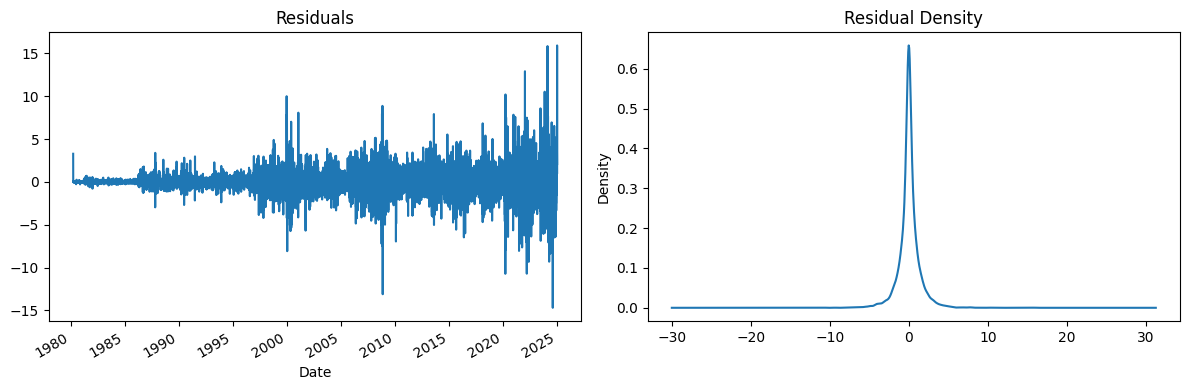

In [24]:
# Check if output directory exists, create if not
import os
if not os.path.exists('output'):
    os.makedirs('output')

# Ensure that model_fit is defined (for example, from an ARIMA/SARIMA model)
# Example: model_fit = sm.tsa.ARIMA(df['Close'], order=(p,d,q)).fit()

# Plot residuals
plt.figure(figsize=(12, 4))

# Residual time plot
plt.subplot(121)
model_fit.resid.plot()  # Plot residuals over time
plt.title('Residuals')

# Residual density plot (KDE)
plt.subplot(122)
model_fit.resid.plot(kind='kde')  # Kernel density plot for residuals
plt.title('Residual Density')

# Adjust layout and save figure
plt.tight_layout()

# Save the plot as a file
plt.savefig('output/residuals_plot.png')

# Show the plot (for debugging purposes)
plt.show()

# Close the figure
plt.close()


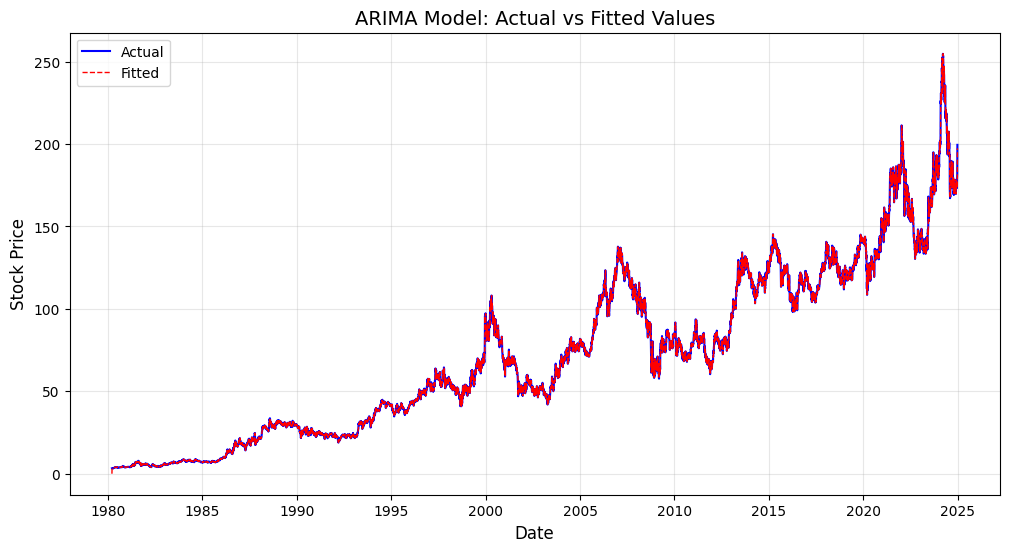

In [27]:
# Check if output directory exists, create if not
import os
if not os.path.exists('output'):
    os.makedirs('output')

# Plot actual vs fitted values
plt.figure(figsize=(12, 6))

# Plot the actual series (e.g., stock prices)
plt.plot(series, label='Actual', color='blue', linewidth=1.5)

# Plot the fitted values from the model
plt.plot(model_fit.fittedvalues, label='Fitted', color='red', linestyle='--', linewidth=1)

# Title and labels
plt.title('ARIMA Model: Actual vs Fitted Values', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(True, alpha=0.3)

# Save the figure to the output folder
plt.savefig('output/actual_vs_fitted.png')

# Show the plot (for debugging)
plt.show()

# Close the figure
plt.close()


            Forecast
2024-12-30       NaN
2024-12-31       NaN
2025-01-01       NaN
2025-01-02       NaN
2025-01-03       NaN
2025-01-06       NaN
2025-01-07       NaN
2025-01-08       NaN
2025-01-09       NaN
2025-01-10       NaN
2025-01-13       NaN
2025-01-14       NaN
2025-01-15       NaN
2025-01-16       NaN
2025-01-17       NaN
2025-01-20       NaN
2025-01-21       NaN
2025-01-22       NaN
2025-01-23       NaN
2025-01-24       NaN
2025-01-27       NaN
2025-01-28       NaN
2025-01-29       NaN
2025-01-30       NaN
2025-01-31       NaN
2025-02-03       NaN
2025-02-04       NaN
2025-02-05       NaN
2025-02-06       NaN
2025-02-07       NaN


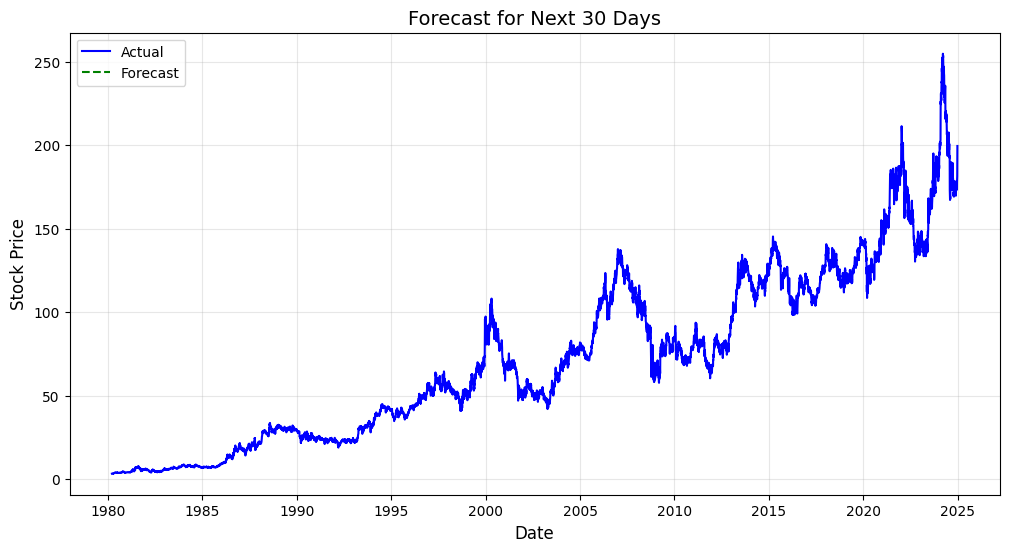

In [29]:
# Ensure that the forecast is generated properly
forecast = model_fit.forecast(steps=30)

# Generate the forecast dates (next 30 business days)
forecast_dates = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Create a DataFrame for the forecast values with their corresponding dates
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)

# Display the forecast DataFrame
print(forecast_df)

# Optionally, plot the forecast alongside the historical data
plt.figure(figsize=(12, 6))

# Plot the historical series (actual data)
plt.plot(series, label='Actual', color='blue', linewidth=1.5)

# Plot the forecasted values
plt.plot(forecast_df['Forecast'], label='Forecast', color='green', linestyle='--', linewidth=1.5)

# Title and labels
plt.title('Forecast for Next 30 Days', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(True, alpha=0.3)

# Save the figure to the output folder
plt.savefig('output/forecast_plot.png')

# Show the plot
plt.show()

# Close the figure
plt.close()


In [32]:
# Forecast for next 30 days
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)
# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(series[-100:], label='Historical', color='blue', linewidth=1.5)
plt.plot(forecast_df, label='Forecast', color='green', linestyle='--', linewidth=2)
plt.fill_between(forecast_df.index, 
                 forecast - 1.96 * model_fit.resid.std(),
                 forecast + 1.96 * model_fit.resid.std(),
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('30-Day Stock Price Forecast for Toyota Motors', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('output/forecast_plot.png')
plt.close()

# Print forecast values
print("\n=== 30-Day Forecast ===")
print(forecast_df)
# Performance metrics
fitted_values = model_fit.fittedvalues
actual_values = series
mse = mean_squared_error(actual_values, fitted_values)
mae = mean_absolute_error(actual_values, fitted_values)
rmse = np.sqrt(mse)

print("\n=== Model Performance Metrics ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


=== 30-Day Forecast ===
            Forecast
2024-12-30       NaN
2024-12-31       NaN
2025-01-01       NaN
2025-01-02       NaN
2025-01-03       NaN
2025-01-06       NaN
2025-01-07       NaN
2025-01-08       NaN
2025-01-09       NaN
2025-01-10       NaN
2025-01-13       NaN
2025-01-14       NaN
2025-01-15       NaN
2025-01-16       NaN
2025-01-17       NaN
2025-01-20       NaN
2025-01-21       NaN
2025-01-22       NaN
2025-01-23       NaN
2025-01-24       NaN
2025-01-27       NaN
2025-01-28       NaN
2025-01-29       NaN
2025-01-30       NaN
2025-01-31       NaN
2025-02-03       NaN
2025-02-04       NaN
2025-02-05       NaN
2025-02-06       NaN
2025-02-07       NaN

=== Model Performance Metrics ===
Mean Squared Error (MSE): 1.87
Mean Absolute Error (MAE): 0.83
Root Mean Squared Error (RMSE): 1.37
